In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/M.ScProject

/content/gdrive/MyDrive/M.ScProject


In [ ]:
!git clone https://github.com/WongKinYiu/yolov9

Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Total 781 (delta 0), reused 0 (delta 0), pack-reused 781 (from 1)
Receiving objects: 100% (781/781), 3.27 MiB | 8.86 MiB/s, done.
Resolving deltas: 100% (330/330), done.
Updating files: 100% (120/120), done.


In [ ]:
%cd yolov9
!pip install -r requirements.txt

/content/gdrive/MyDrive/M.ScProject/yolov9
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
#Downloading weights
HOME = '/content/gdrive/MyDrive/M.ScProject/yolov9'
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
import os
drive_folder = '/content/gdrive/MyDrive/M.ScProject/yolov9'
os.chdir(drive_folder)

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="YkLZBrUJ0gpa3XI1P0lZ")
project = rf.workspace("anngspace-viq6y").project("llvip-thermal")
version = project.version(2)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to llvip-thermal-2 in yolov9:: 100%|██████████| 19807/19807 [03:54<00:00, 84.34it/s]


In [ ]:
%ls {HOME}/llvip-thermal-2

data.yaml  README.dataset.txt  README.roboflow.txt  test/  train/


In [ ]:
!python train.py \
--batch 16 --epochs 10 --img 320 --device 0 --min-items 0 --close-mosaic 15 \
--data {drive_folder}/llvip-thermal-2/data.yaml \
--weights {drive_folder}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml


2024-09-22 04:40:15.158449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 04:40:15.178289: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 04:40:15.184472: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-22 04:40:15.199878: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-22 04:40:16.421997: W tensorflow/compiler/tf2

In [ ]:
!ls {drive_folder}/runs/train/exp3/

confusion_matrix.png				    labels_correlogram.jpg  PR_curve.png  weights
events.out.tfevents.1726980032.46e2477a3d44.1071.0  labels.jpg		    R_curve.png
F1_curve.png					    opt.yaml		    results.csv
hyp.yaml					    P_curve.png		    results.png


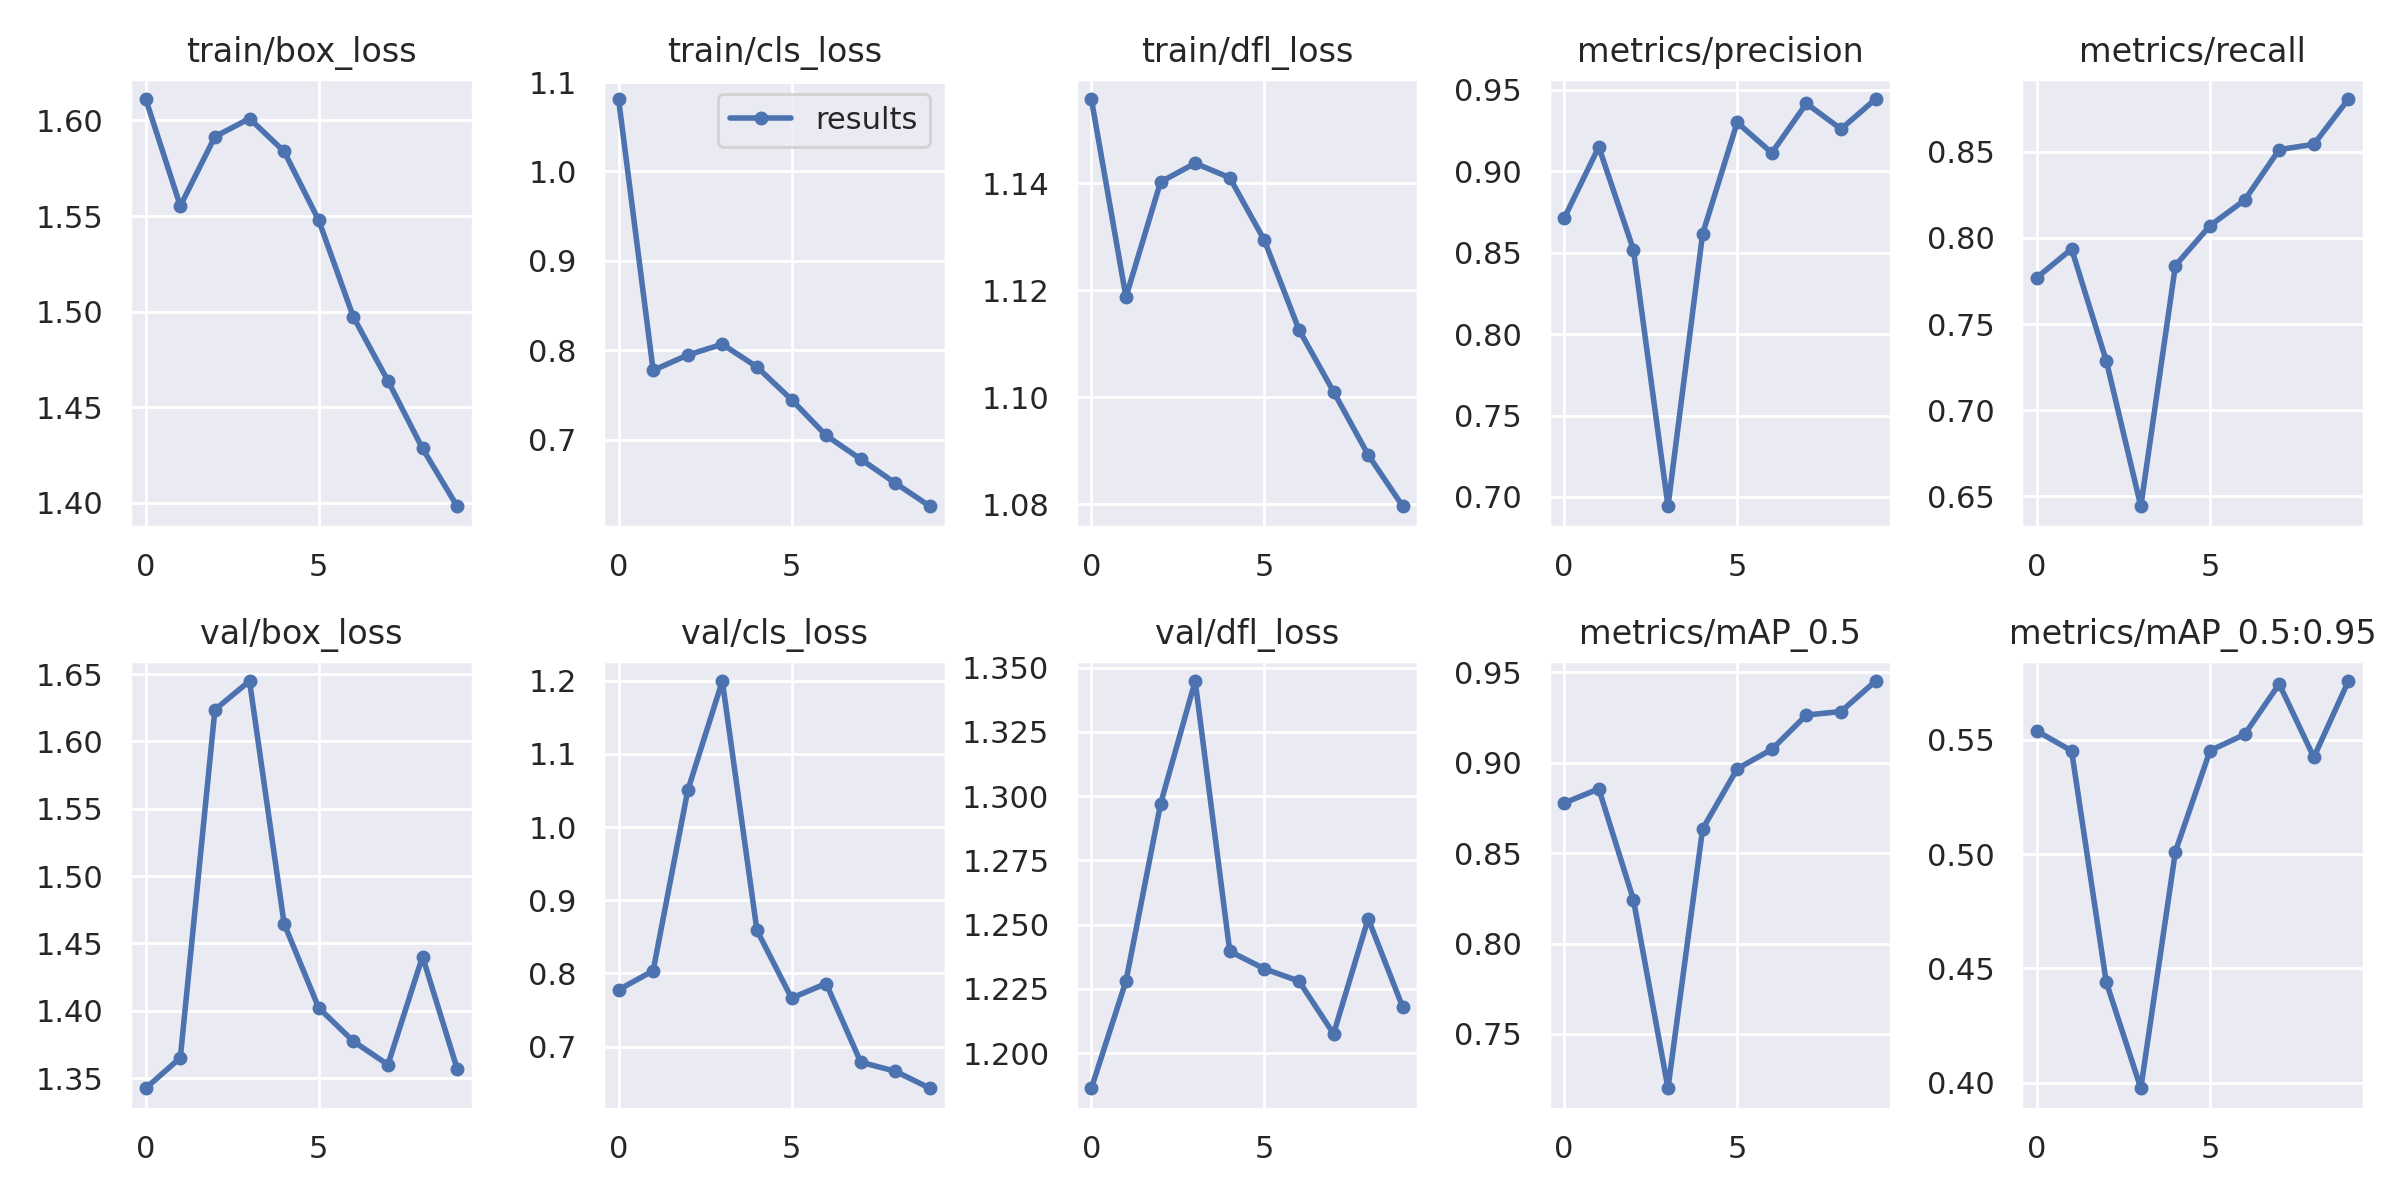

In [ ]:
from IPython.display import Image
Image(filename=f"{drive_folder}/runs/train/exp3/results.png", width=1000)

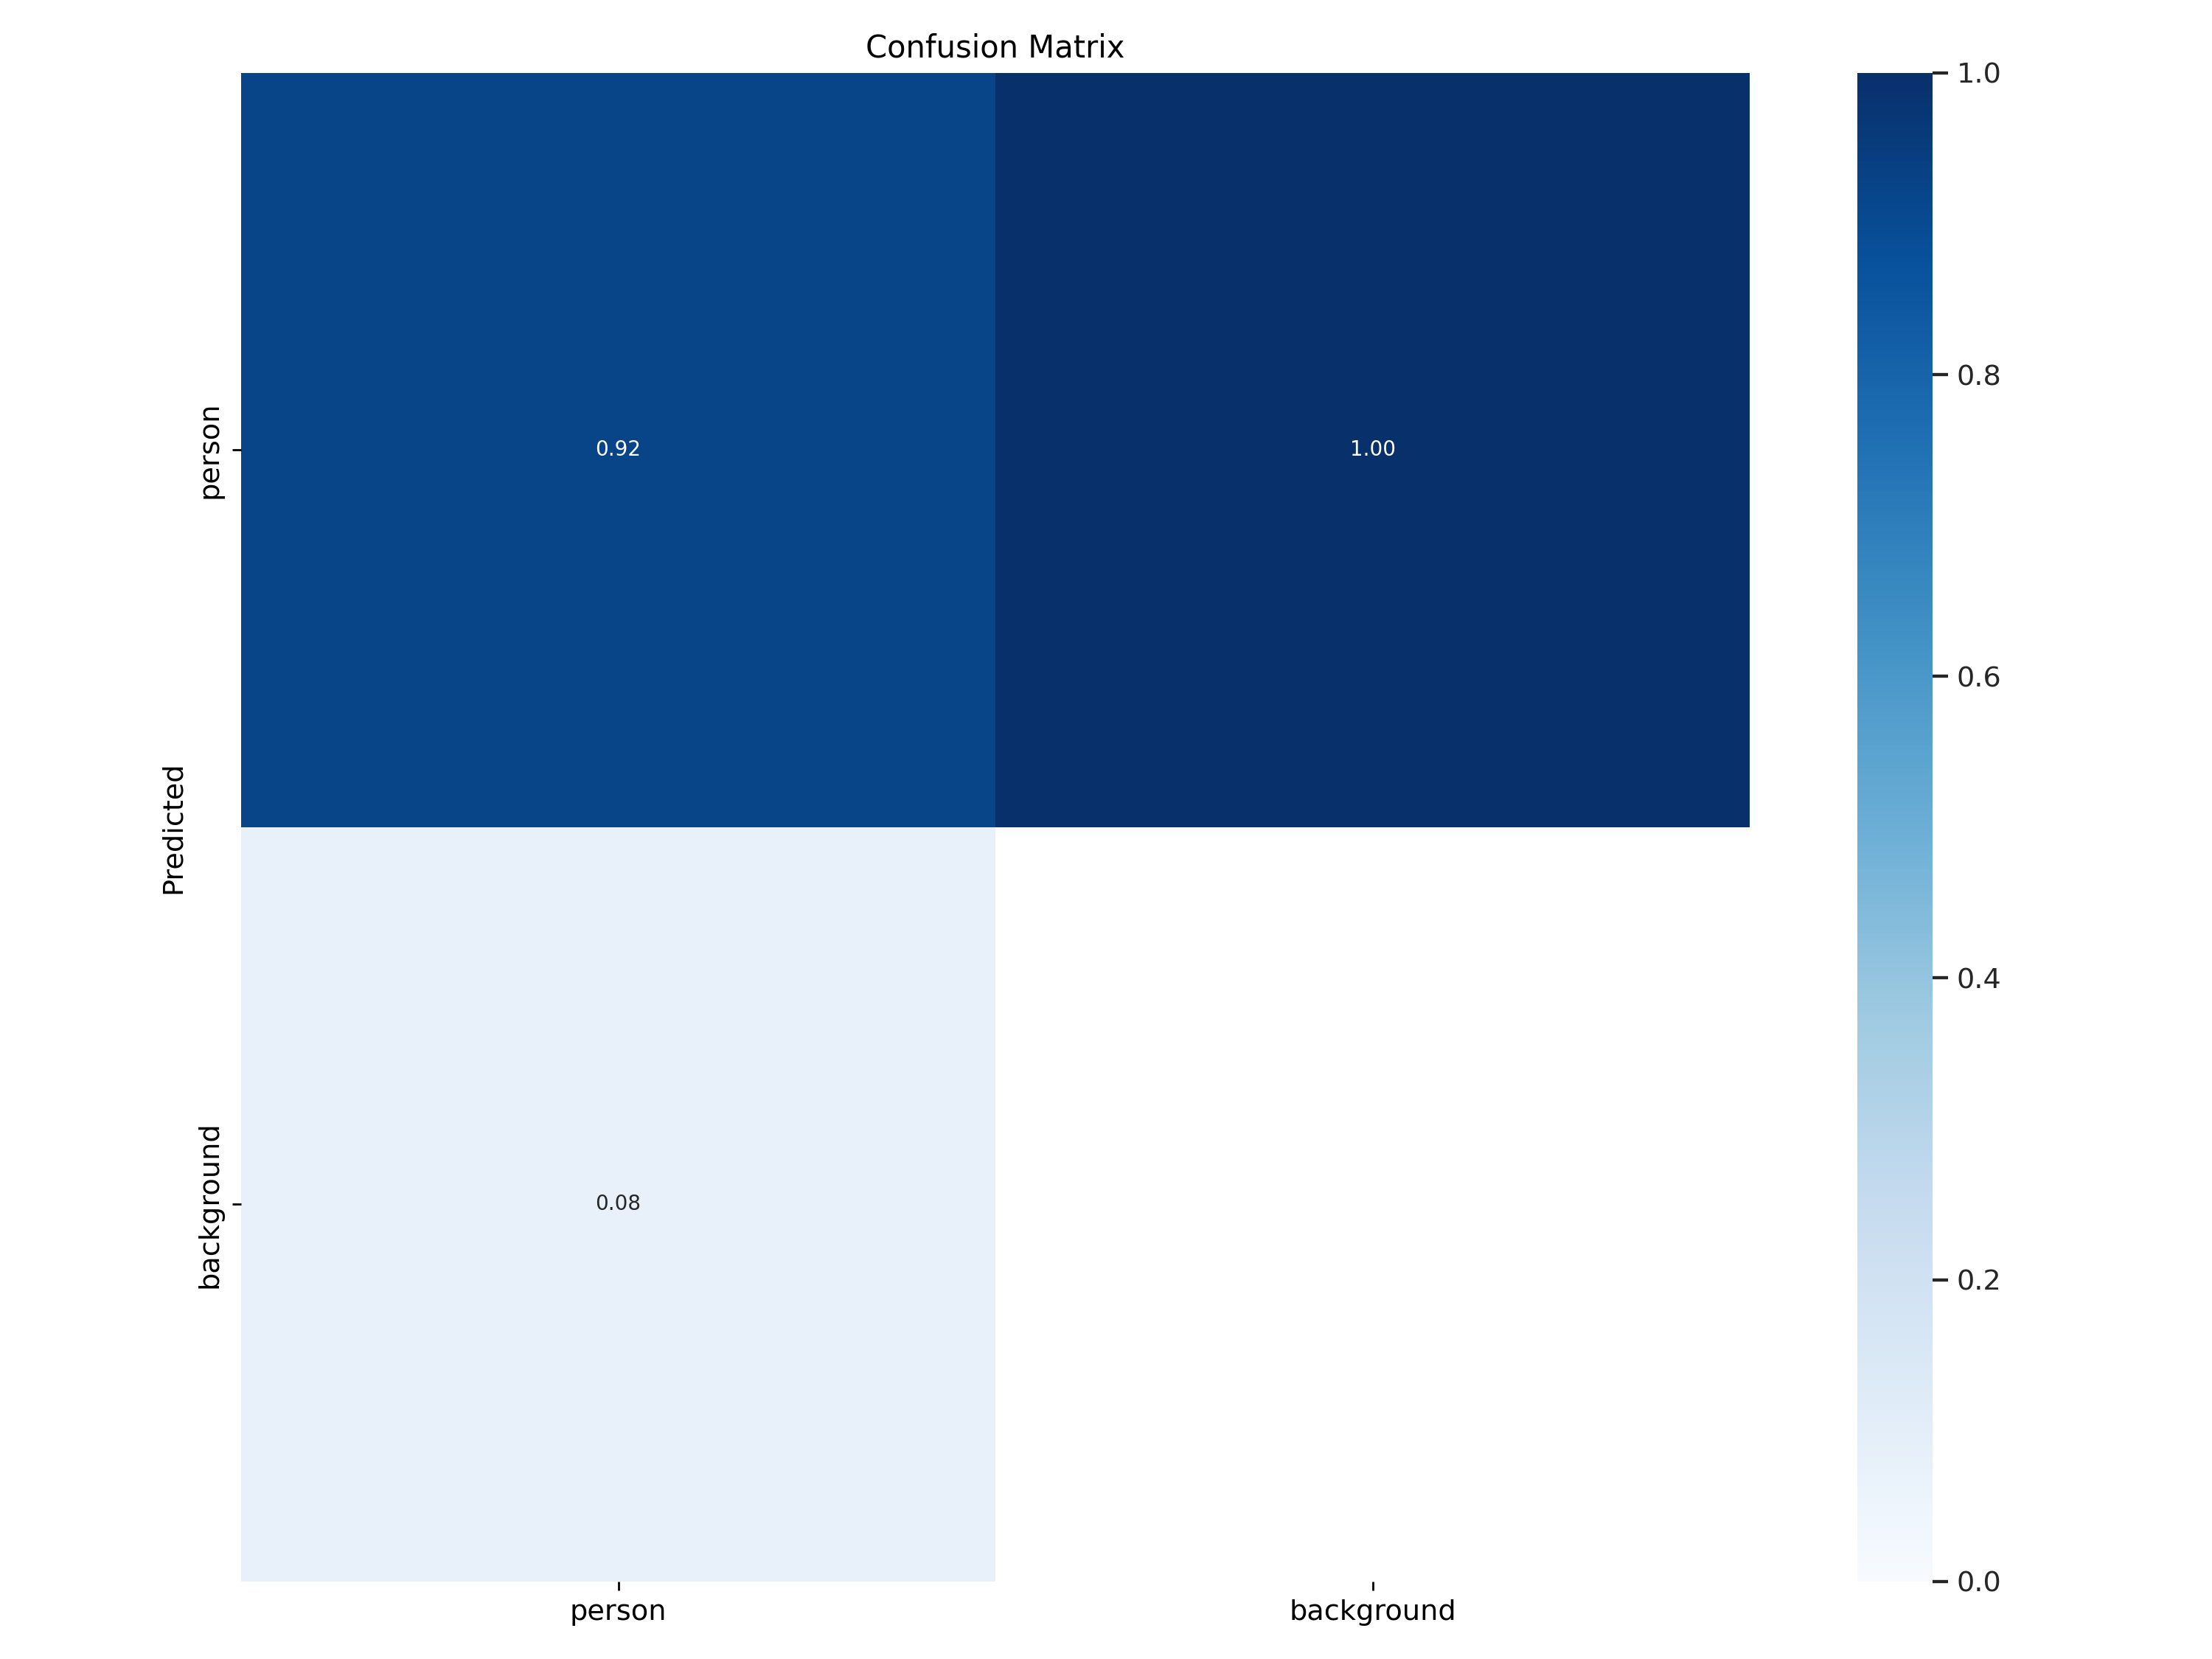

In [ ]:
from IPython.display import Image
Image(filename=f"{drive_folder}/runs/train/exp3/confusion_matrix.png", width=1000)

In [ ]:
#Validating custom model
!python val.py \
--img 320 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {drive_folder}/llvip-thermal-2/data.yaml \
--weights {drive_folder}/runs/train/exp3/weights/best.pt

val: data=/content/gdrive/MyDrive/M.ScProject/yolov9/llvip-thermal-2/data.yaml, weights=['/content/gdrive/MyDrive/M.ScProject/yolov9/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/gdrive/MyDrive/M.ScProject/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the defa

In [ ]:
#Testing
!python detect.py \
--img 320 --conf 0.1 --device 0 \
--weights {drive_folder}/runs/train/exp3/weights/best.pt \
--source {drive_folder}/llvip-thermal-2/test/images

detect: weights=['/content/gdrive/MyDrive/M.ScProject/yolov9/runs/train/exp3/weights/best.pt'], source=/content/gdrive/MyDrive/M.ScProject/yolov9/llvip-thermal-2/test/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/gdrive/MyDrive/M.ScProject/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/

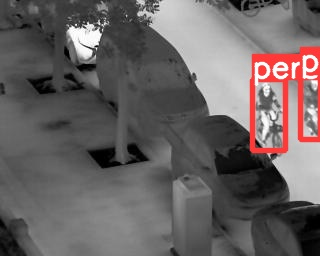

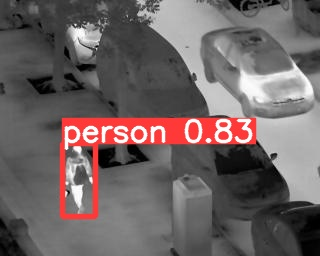

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{drive_folder}/runs/detect/exp/*.jpg')[:2]:
      display(Image(filename=image_path, width=640))

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{drive_folder}/runs/detect/exp/190014_jpg.rf.1e938d379443eeefea986c281929c06b.jpg')[:2]:
      display(Image(filename=image_path, width=640))


NameError: name 'drive_folder' is not defined